In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**(1)** Are the exam scores (math, reading, writing) normally distributed? If not, what can we do to have a normal distribution?

In [4]:
df = pd.read_csv("StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0.5, 1.0, 'histogram of writing score')

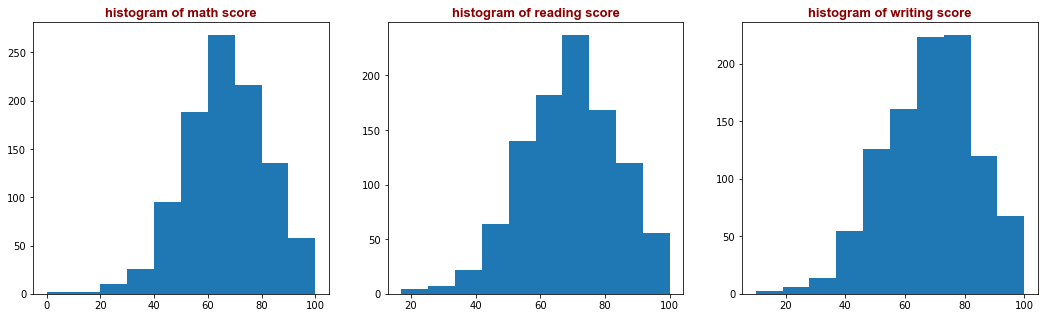

In [11]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.hist(df["math score"]);
plt.title("histogram of math score", fontdict=title_font)

plt.subplot(1,3,2)
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.hist(df["reading score"]);
plt.title("histogram of reading score", fontdict=title_font)

plt.subplot(1,3,3)
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.hist(df["writing score"]);
plt.title("histogram of writing score", fontdict=title_font)


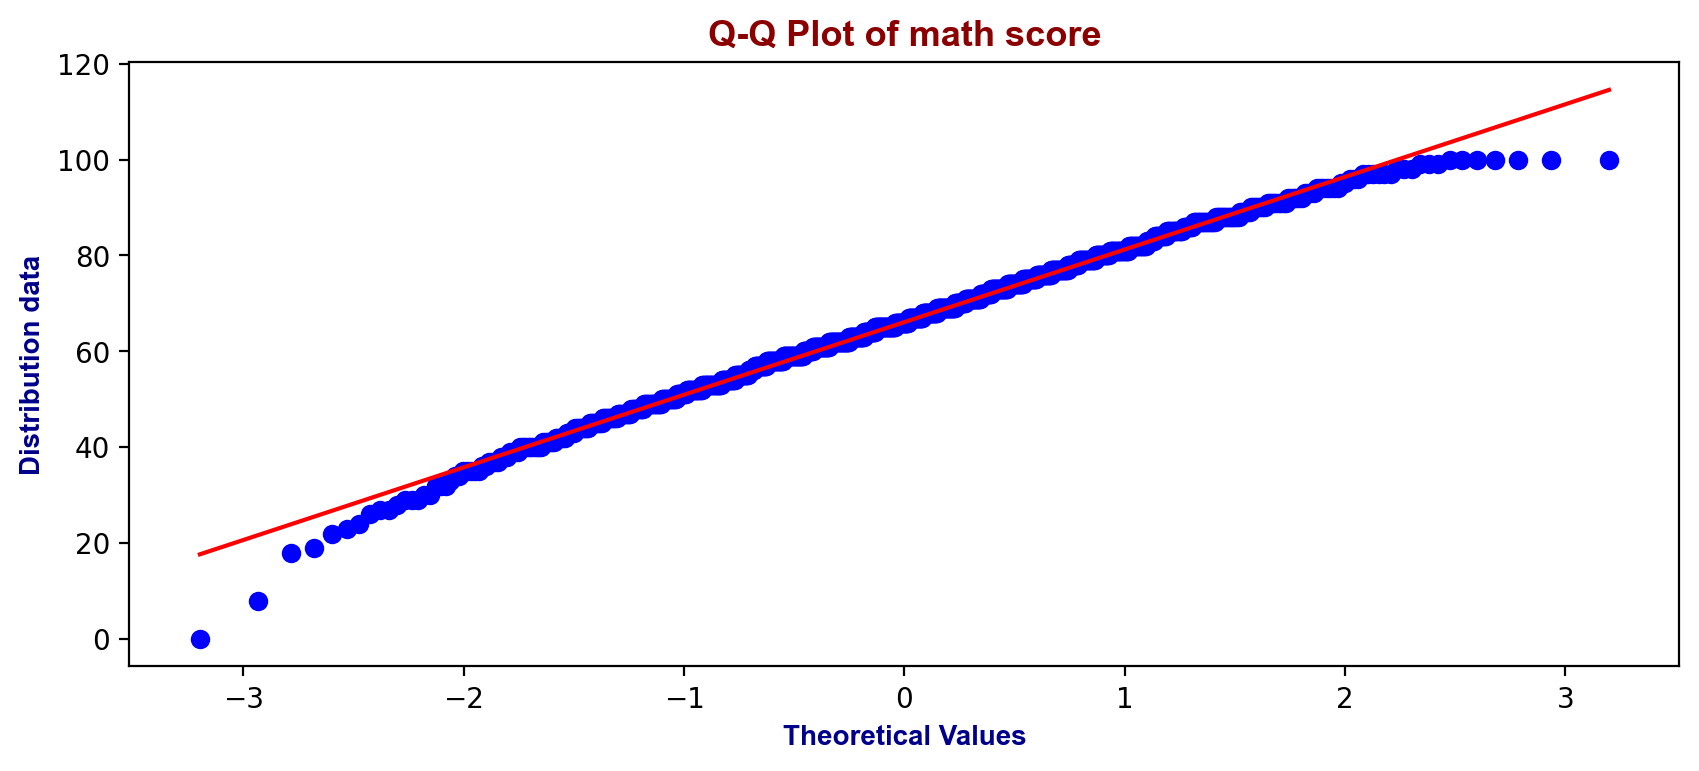

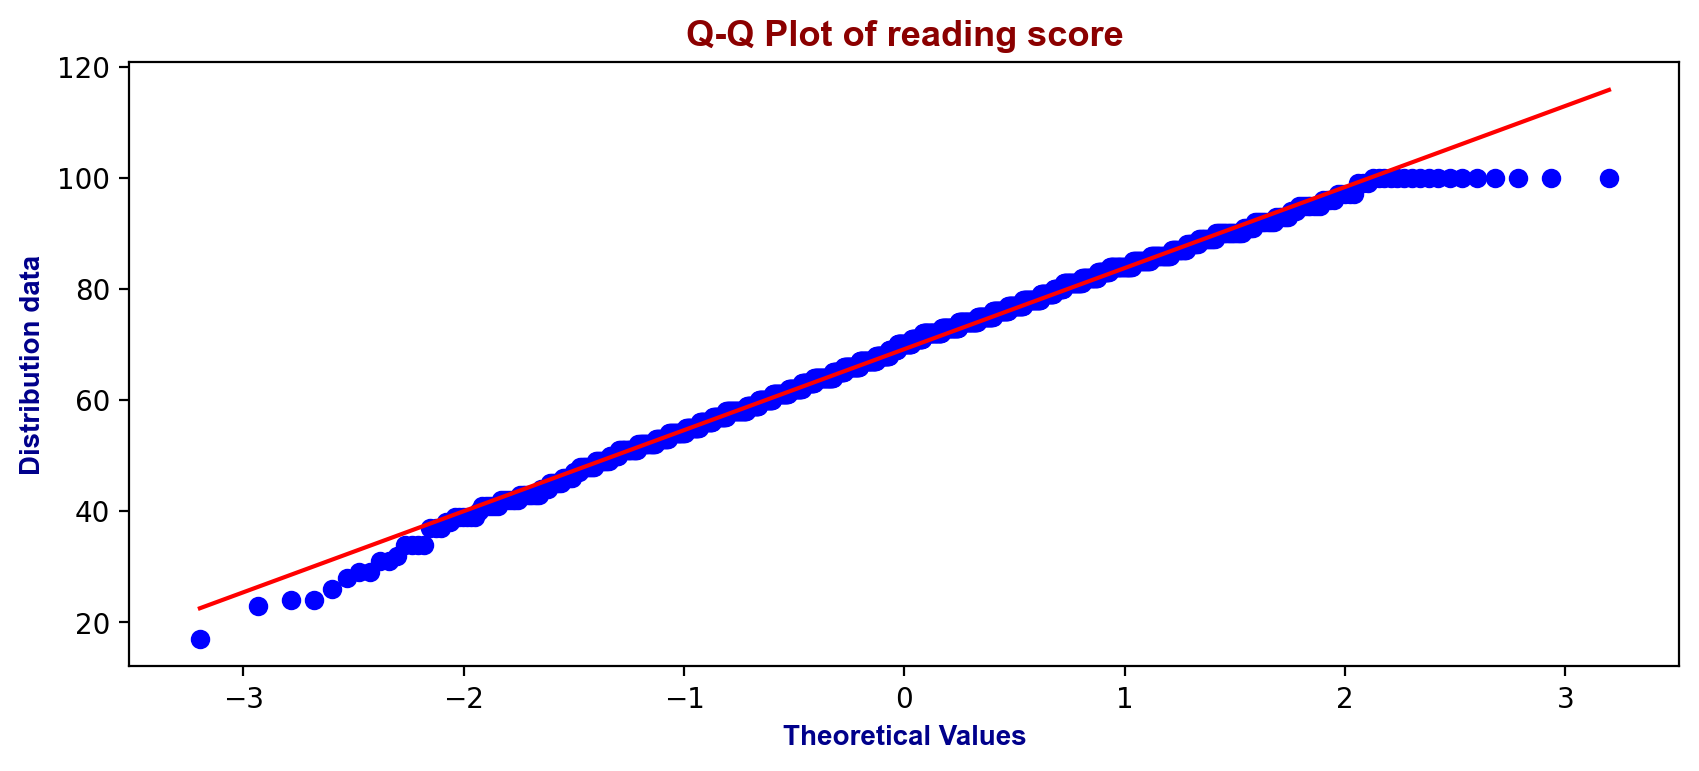

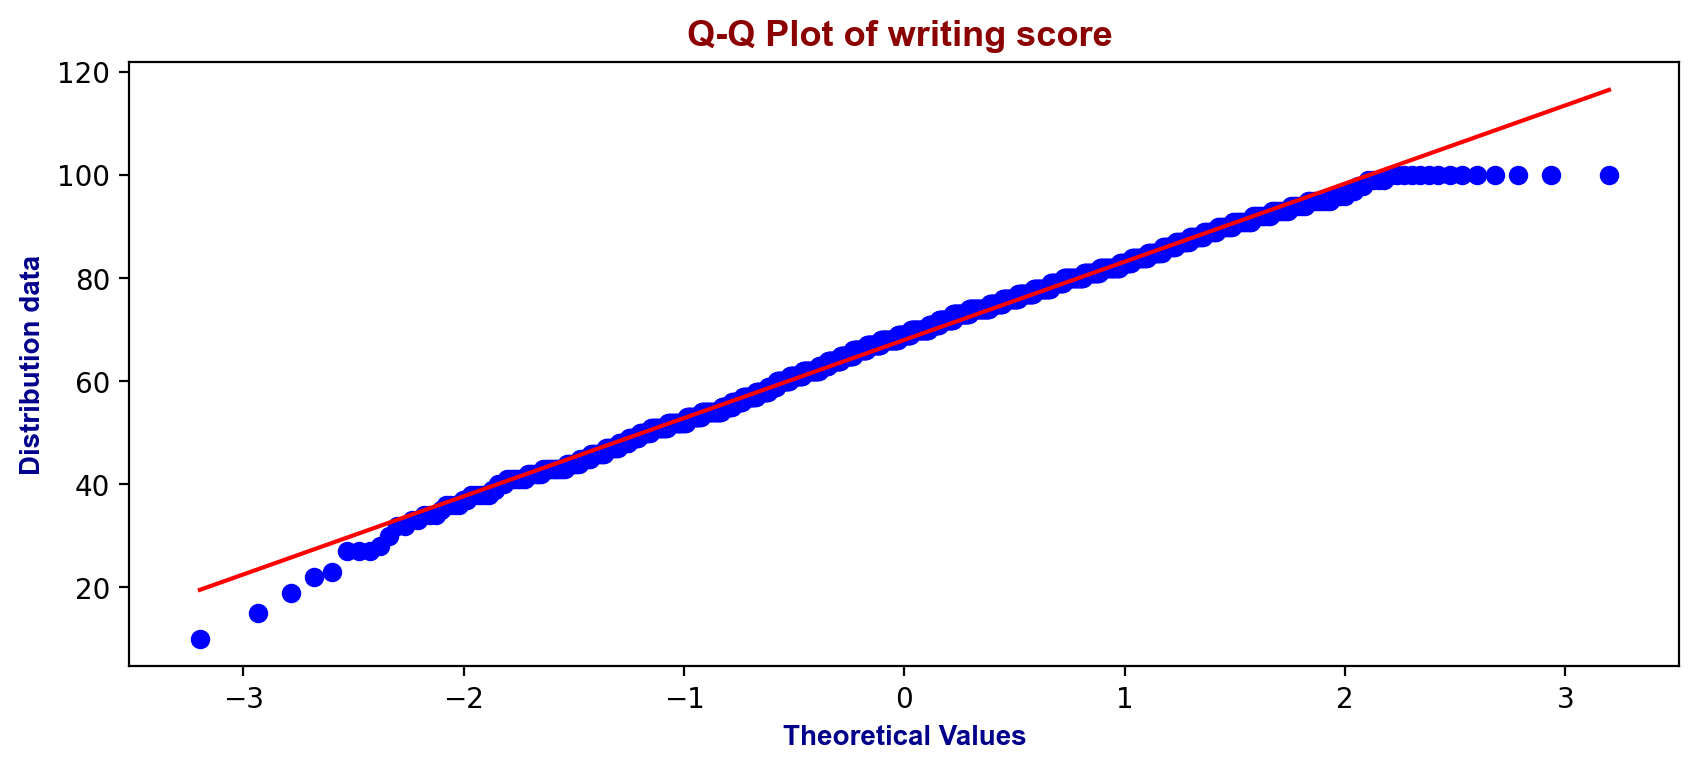

In [14]:

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,4), dpi = 200)
res = stats.probplot(df["math score"], plot=plt)
plt.title("Q-Q Plot of math score", fontdict = title_font)
plt.xlabel("Theoretical Values", fontdict = axis_font)
plt.ylabel("Distribution data", fontdict = axis_font)
plt.show()

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,4), dpi = 200)
res = stats.probplot(df["reading score"], plot=plt)
plt.title("Q-Q Plot of reading score", fontdict = title_font)
plt.xlabel("Theoretical Values", fontdict = axis_font)
plt.ylabel("Distribution data", fontdict = axis_font)
plt.show()

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,4), dpi = 200)
res = stats.probplot(df["writing score"], plot=plt)
plt.title("Q-Q Plot of writing score ", fontdict = title_font)
plt.xlabel("Theoretical Values", fontdict = axis_font)
plt.ylabel("Distribution data", fontdict = axis_font)
plt.show()

**we can say that the data is almost normally distributed.**

**(2)** We want to keep the three exam results in one variable, as the target variable. To do this, define a new variable containing the average of the three exams. Test whether the average of this new variable is normally distributed. If it does not have a normal distribution, try to make it normally distributed by transforming and test the result of the transformation.

In [16]:
df["average score"] = df[["math score","reading score","writing score"]].apply(np.mean,axis=1)

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


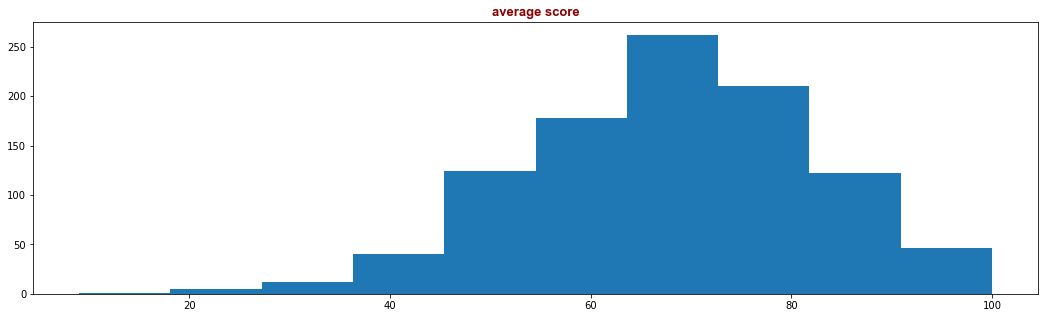

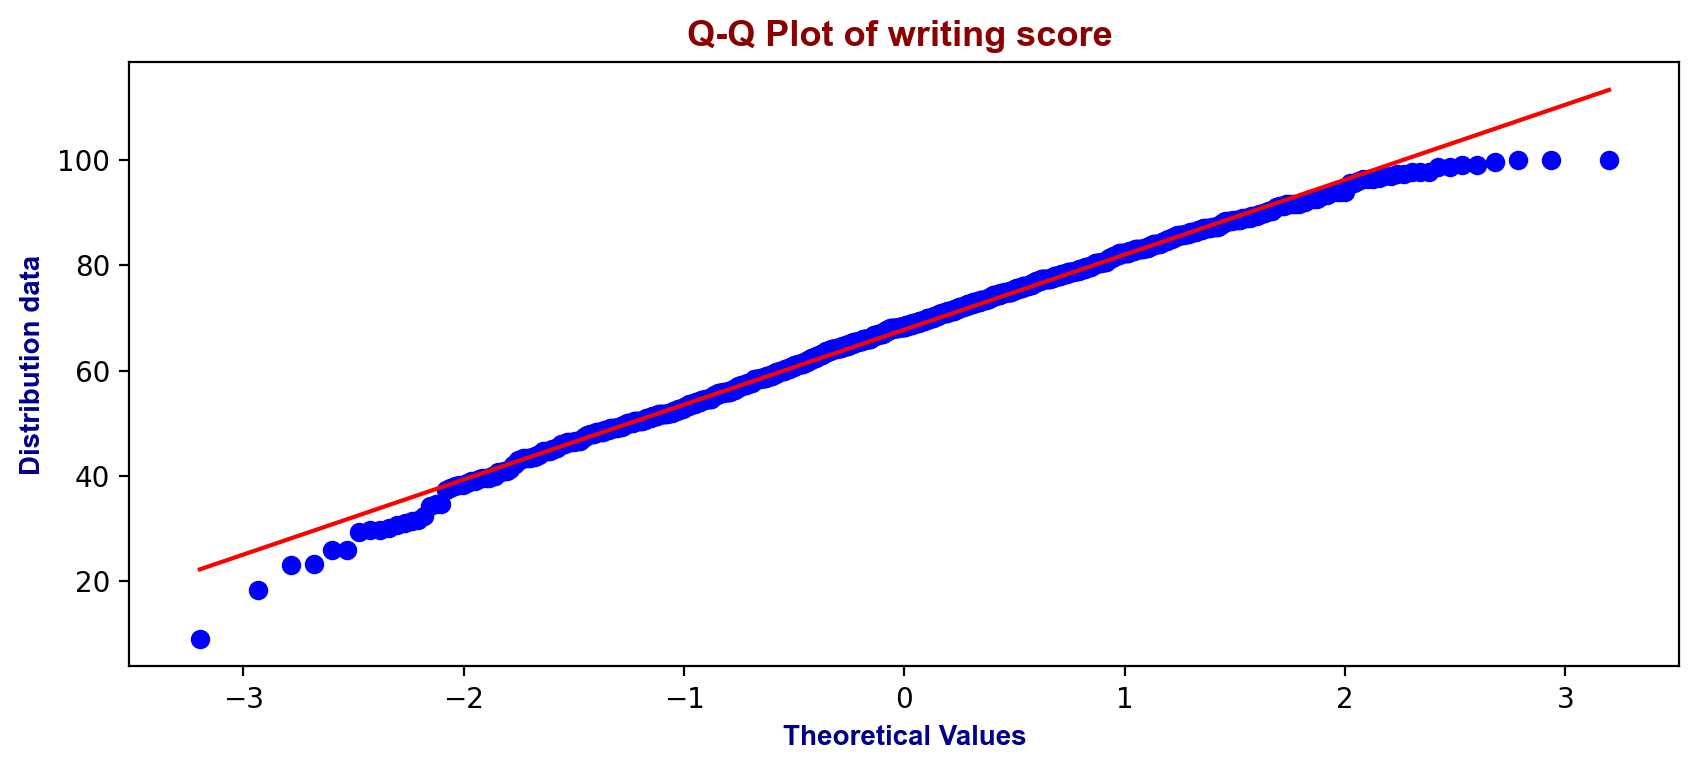

In [18]:
plt.figure(figsize=(18,5))
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.hist(df["average score"]);
plt.title("average score", fontdict=title_font)
plt.show()


plt.figure(figsize=(10,4), dpi = 200)
res = stats.probplot(df["average score"], plot=plt)
plt.title("Q-Q Plot of writing score ", fontdict = title_font)
plt.xlabel("Theoretical Values", fontdict = axis_font)
plt.ylabel("Distribution data", fontdict = axis_font)
plt.show()

after log transformation

In [48]:
def normality(data,feature):
    title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
    axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
    plt.figure(figsize=(15,8))
    plt.subplot(1,3,1)
    sns.kdeplot(data[feature])
    plt.title(f"kde plot {feature}", fontdict=title_font)
    plt.subplot(1,3,2)
    stats.probplot(data[feature],plot=plt)
    plt.title(f"Q-Q Plot of {feature} ", fontdict = title_font)
    plt.xlabel("Theoretical Values", fontdict = axis_font)
    plt.ylabel("Distribution data", fontdict = axis_font)
    plt.subplot(1,3,3)
    plt.hist(data[feature]);
    plt.title(f"histogram of {feature}", fontdict=title_font)
    plt.show()


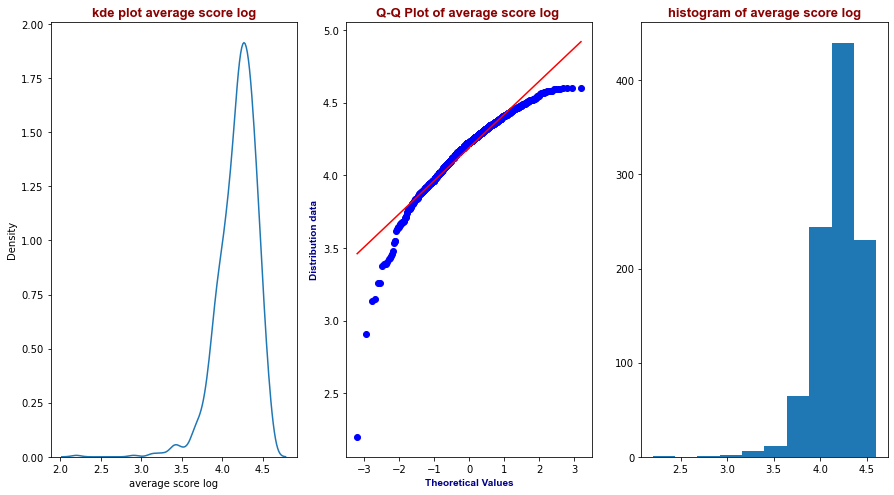

In [49]:
df['average score log']=np.log(df['average score'])
normality(df,"average score log")

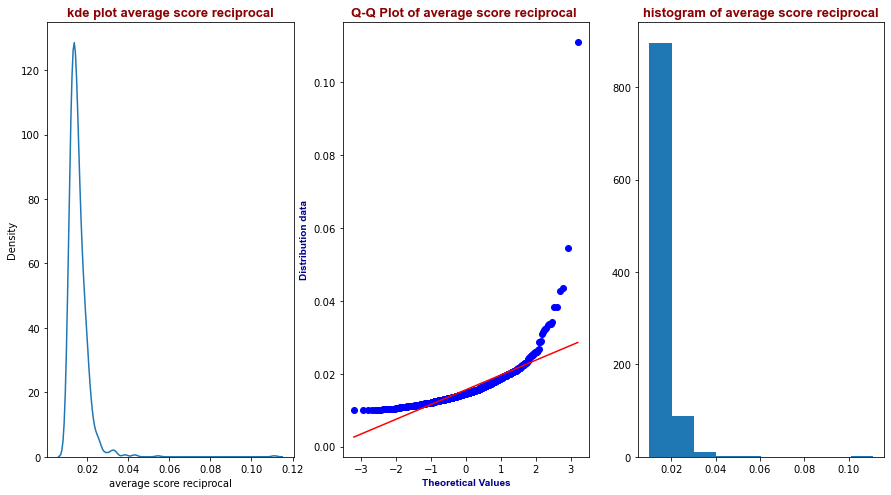

In [50]:
df['average score reciprocal']=1/df['average score']
normality(df,'average score reciprocal')

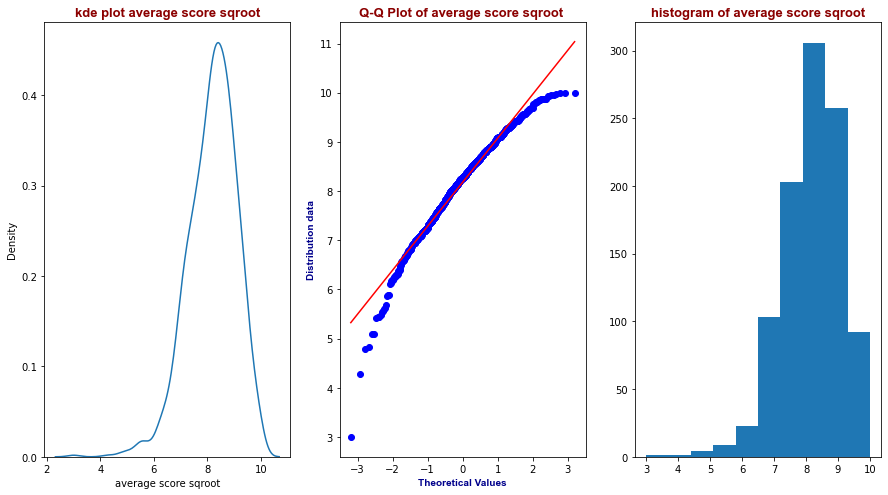

In [51]:
df['average score sqroot']=np.sqrt(df['average score'])
normality(df,'average score sqroot')


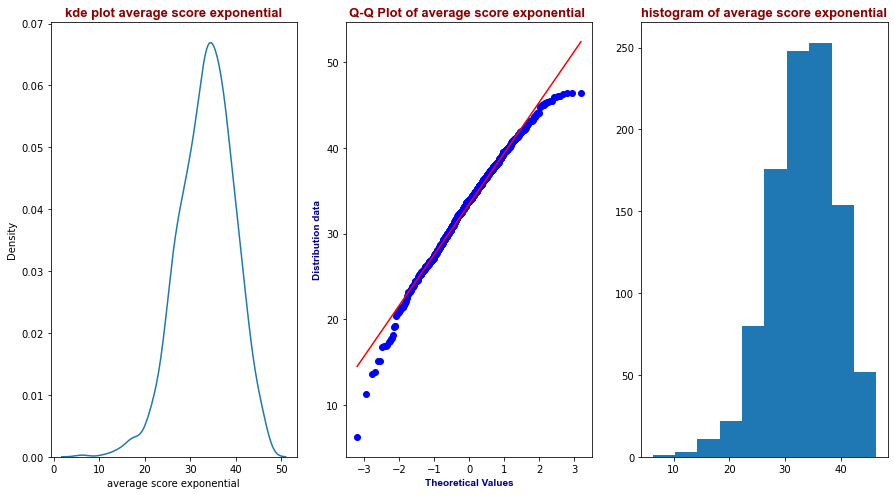

In [52]:
df['average score exponential']=df['average score']**(1/1.2)
normality(df,'average score exponential')

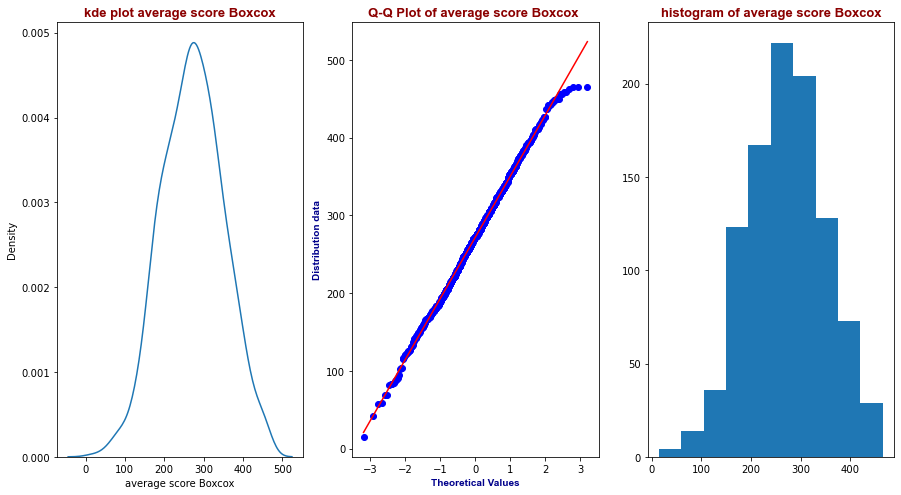

In [53]:
df['average score Boxcox'],parameters=stats.boxcox(df['average score'])
normality(df,'average score Boxcox')

**as you can see from graph, the best way for normality is boxcox**

In [75]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score', 'average score Boxcox'],
      dtype='object')

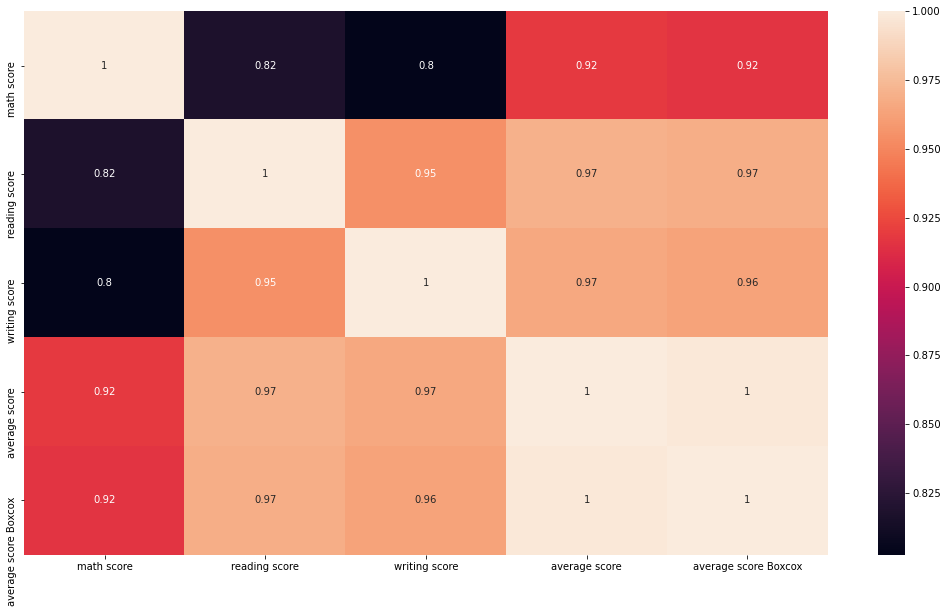

In [76]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot = True);

**(3)** Which variables seem to be related to the target variable we created in the previous question? If our goal was to explain the factors that determine the success of the exam, which variables should we keep in our data set?

**if the target is average score the writing reading and math score is must be included to feature** 

**(4)** Does the test preparation course have an impact on the target variable you created?

**of course to determine the necessary parameter we need to do this determination. it has a big effect to our model. and if we increase the number of feature, the complexity of our model will increase too.Therefore, we need to eliminate the unnecessary feature. and goal of this procedure is to define best feature for our model.** 